In [1]:
!conda install git -y

Solving environment: done

# All requested packages already installed.



In [2]:
from time import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report
import joblib
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [3]:
spotify = pd.read_csv("data/spotify-song-attributes.csv", index_col=0)
spotify.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [4]:
print("Spotify data shape:", spotify.shape)

Spotify data shape: (2017, 16)


In [5]:
spotify = spotify.drop(columns=["song_title", "artist"])
spotify.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1


In [6]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2017 entries, 0 to 2016
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      2017 non-null   float64
 1   danceability      2017 non-null   float64
 2   duration_ms       2017 non-null   int64  
 3   energy            2017 non-null   float64
 4   instrumentalness  2017 non-null   float64
 5   key               2017 non-null   int64  
 6   liveness          2017 non-null   float64
 7   loudness          2017 non-null   float64
 8   mode              2017 non-null   int64  
 9   speechiness       2017 non-null   float64
 10  tempo             2017 non-null   float64
 11  time_signature    2017 non-null   float64
 12  valence           2017 non-null   float64
 13  target            2017 non-null   int64  
dtypes: float64(10), int64(4)
memory usage: 236.4 KB


/Users/septyaprilliandary/opt/anaconda3/envs/hacktiv8-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(*args, **kw)>

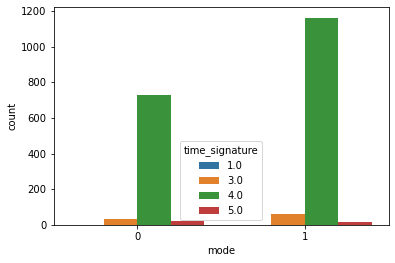

In [7]:
spotify["mode"].value_counts()

sns.countplot("mode", hue="time_signature", data=spotify)
plt.show

In [8]:
spotify["target"].value_counts()

1    1020
0     997
Name: target, dtype: int64

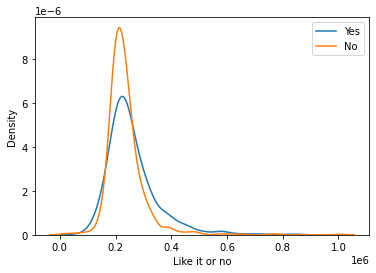

In [9]:
sns.kdeplot(spotify.duration_ms[spotify.target==1])
sns.kdeplot(spotify.duration_ms[spotify.target==0])
plt.legend(["Yes", "No"])
plt.xlabel("Like it or no")
plt.show()

In [10]:
X = spotify[["acousticness", "danceability", "mode", "tempo"]]
y = spotify["target"]

display(X.head())
display(y.head())

,acousticness,danceability,mode,tempo
0,0.0102,0.833,1,150.062
1,0.1990,0.743,1,160.083
2,0.0344,0.838,1,75.044
3,0.6040,0.494,1,86.468
4,0.1800,0.678,0,174.004


0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [11]:
def train_model(X, y, model, test_size=.3):
    X_train, X_dev, y_train, y_dev = train_test_split(
        X, y, test_size=test_size, random_state=109
    )
    print(f"Training with {X_train.shape[0]} data.. Validating with {X_dev.shape[0]}..")

    print("Standardizing data..")
    scaler = StandardScaler()
    scaled_X_train = scaler.fit_transform(X_train)
    scaled_X_dev = scaler.transform(X_dev)
    
    start = time()
    model.fit(X_train, y_train)
    end = time()
    print(f"Done training {model.__class__.__name__} in {end-start:.3f}s")
    
    train_prediction = model.predict(scaled_X_train)
    dev_prediction = model.predict(scaled_X_dev)

    print("Training performance:")
    print(classification_report(y_train, train_prediction))

    print("Development performance:")
    print(classification_report(y_dev, dev_prediction))

In [12]:
models = [
    LogisticRegression(),
    GaussianNB()
]

for model in models:
    print(f"=== Using{model.__class__.__name__} ===")
    train_model(X, y, model)

=== UsingLogisticRegression ===
Training with 1411 data.. Validating with 606..
Standardizing data..
Done training LogisticRegression in 0.027s
Training performance:
              precision    recall  f1-score   support

           0       0.58      0.77      0.66       702
           1       0.66      0.44      0.53       709

    accuracy                           0.60      1411
   macro avg       0.62      0.60      0.59      1411
weighted avg       0.62      0.60      0.59      1411

Development performance:
              precision    recall  f1-score   support

           0       0.54      0.74      0.63       295
           1       0.62      0.40      0.49       311

    accuracy                           0.57       606
   macro avg       0.58      0.57      0.56       606
weighted avg       0.58      0.57      0.56       606

=== UsingGaussianNB ===
Training with 1411 data.. Validating with 606..
Standardizing data..
Done training GaussianNB in 0.002s
Training performance:
     

In [13]:
model = Pipeline(
    [("scaler", StandardScaler()), ("classifier", LogisticRegression())]
)

# model, scaler = train_model(X, y, model)
X_train, X_dev, y_train, y_dev = train_test_split(X, y, test_size=.3, random_state=109)
model.fit(X_train, y_train)
print(classification_report(y, model.predict(X)))

              precision    recall  f1-score   support

           0       0.60      0.53      0.56       997
           1       0.58      0.65      0.62      1020

    accuracy                           0.59      2017
   macro avg       0.59      0.59      0.59      2017
weighted avg       0.59      0.59      0.59      2017



In [14]:
model.named_steps["scaler"]

StandardScaler()

In [15]:
# Save the model
joblib.dump(model, "h8-deployment/data/model.joblib")

['h8-deployment/data/model.joblib']

In [16]:
# Use existing model
existing_model = joblib.load("h8-deployment/data/model.joblib")

In [17]:
!conda install flask -y

Solving environment: done

## Package Plan ##

  environment location: /Users/septyaprilliandary/opt/anaconda3/envs/hacktiv8-env

  added / updated specs:
    - flask


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    click-7.1.2                |     pyhd3eb1b0_0          64 KB
    ------------------------------------------------------------
                                           Total:          64 KB

The following NEW packages will be INSTALLED:

  click              pkgs/main/noarch::click-7.1.2-pyhd3eb1b0_0
  flask              pkgs/main/noarch::flask-1.1.2-py_0
  itsdangerous       pkgs/main/noarch::itsdangerous-1.1.0-py_0
  werkzeug           pkgs/main/noarch::werkzeug-1.0.1-py_0



click-7.1.2          | 64 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done
